(13, 173)


C:\Users\azriel\AppData\Local\Temp\ipykernel_22536\2565409269.py:20: FutureWarning: Pass y=[-3.52297297e-06 -9.46231012e-06 -3.39051485e-06 ...  4.31234766e-05
  1.04279505e-04  3.57992249e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr=sample_rate)


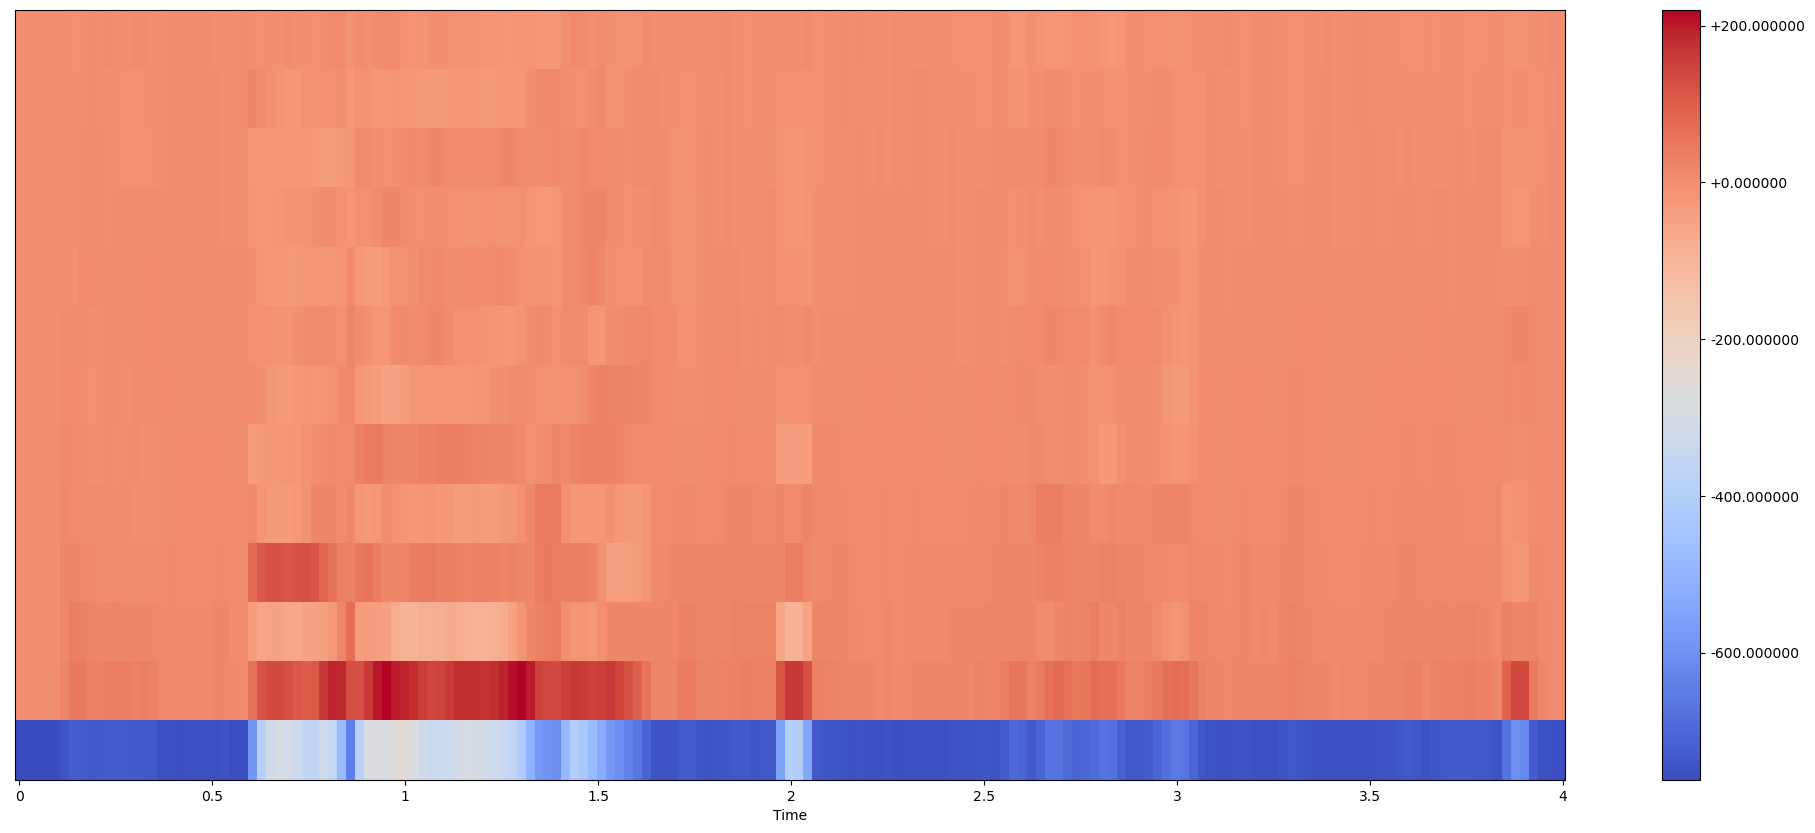

(13, 173)
(13, 173)


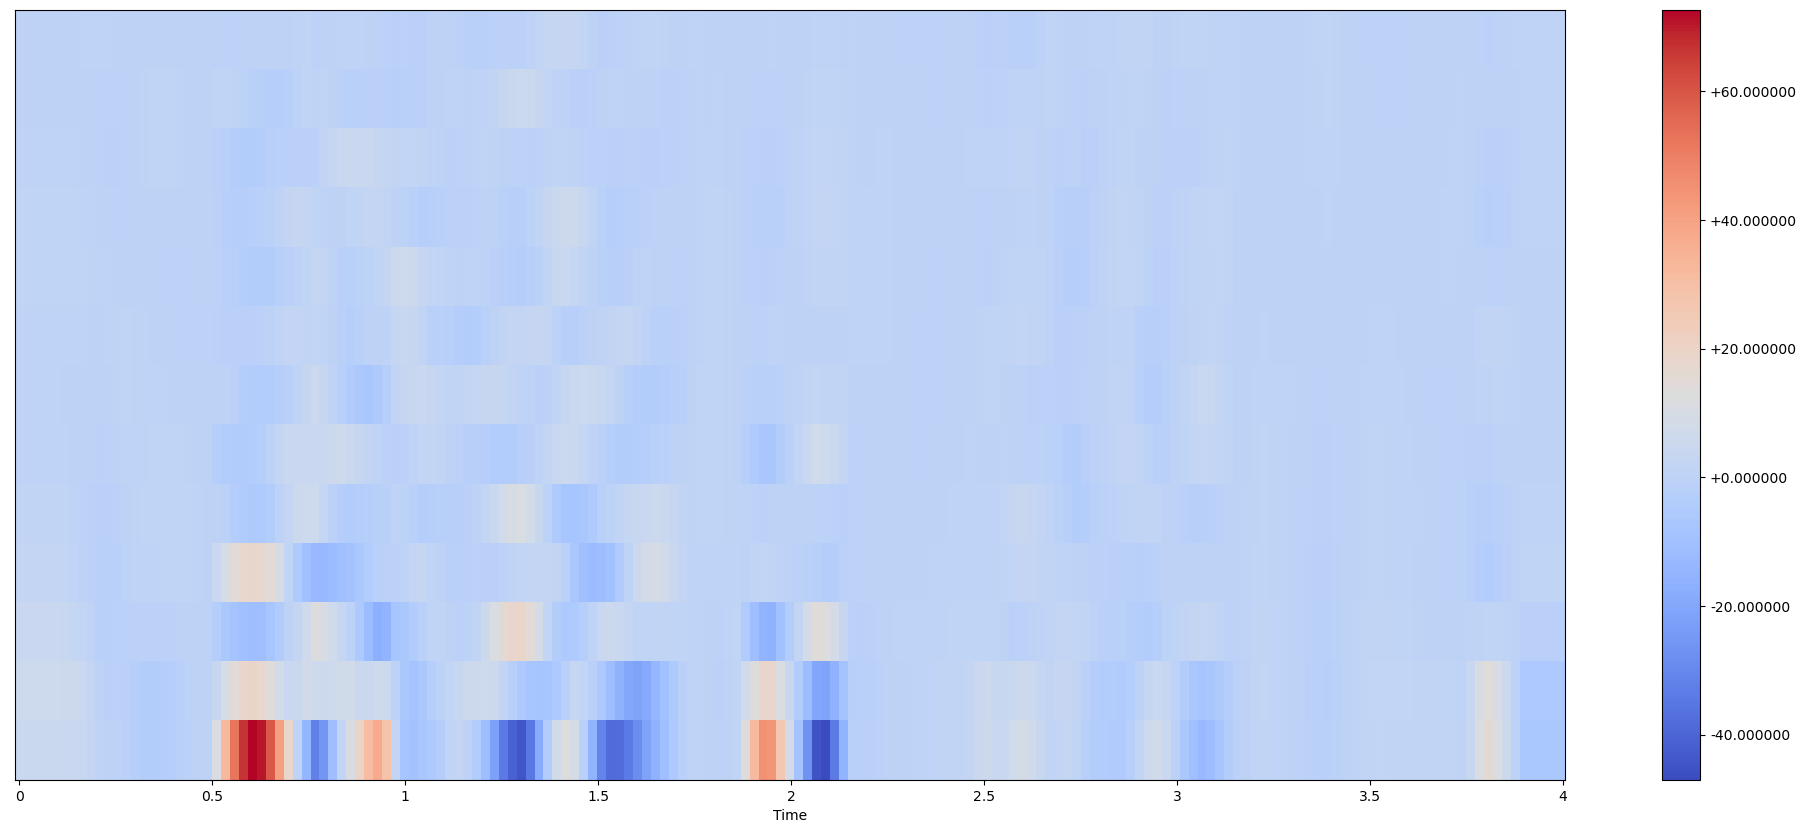

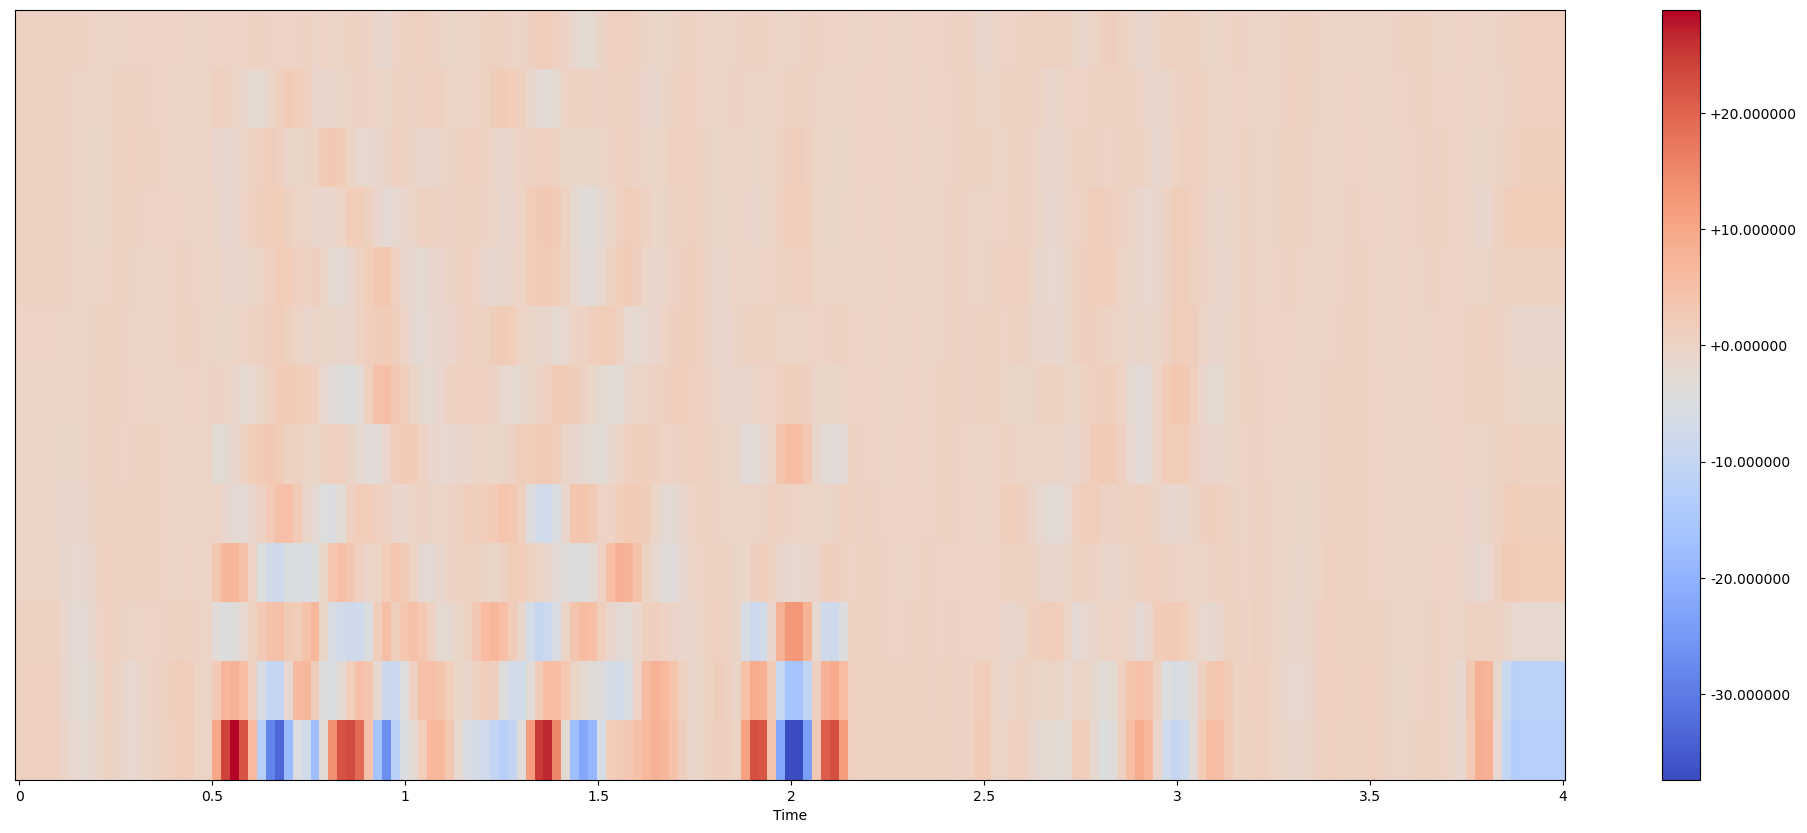

[[-7.6228253e+02 -7.6228253e+02 -7.6228253e+02 ... -7.5233984e+02
  -7.5421808e+02 -7.5736023e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.3640390e+01
   1.0837973e+01  6.8342829e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2453192e+01
   9.4422684e+00  6.5293846e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6895609e-01
   1.7117198e+00  3.7340279e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.7959934e-02
   1.3686569e+00  3.4186578e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.8395719e-01
   1.5728476e+00  3.2153218e+00]]


In [8]:
import pyaudio
import torch
import torchaudio
import requests
import pathlib
import wave
# Plot waveform and spectrogram
import matplotlib.pyplot as plt
import os
import librosa
import sklearn
import librosa.display
import numpy as np
from pydub import AudioSegment
from IPython.display import Audio, display

signal, sample_rate = librosa.load("InputAbraham.wav")

#Extract MFCCs
mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr=sample_rate)
print(mfccs.shape)

# Visualize MFCCs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs, x_axis="time", sr=sample_rate)
plt.colorbar(format="%+2f")
plt.show()

#Calculate delta and delta2 MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

print(delta_mfccs.shape)
print(delta2_mfccs.shape)

plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sample_rate)
plt.colorbar(format="%+2f")
plt.show()

plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sample_rate)
plt.colorbar(format="%+2f")
plt.show()

comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
comprehensive_mfccs.shape

print(mfccs)

In [33]:
for i in mfccs:
    print(i)

[-762.28253 -762.28253 -762.28253 -762.28253 -762.28253 -746.0123
 -724.6345  -730.0864  -737.24133 -734.32184 -729.37683 -731.26666
 -732.23737 -733.6285  -733.40814 -739.1729  -751.321   -753.298
 -754.82635 -753.1959  -753.5101  -754.1426  -751.31024 -749.82495
 -755.047   -756.0268  -587.5604  -395.0045  -318.7394  -296.72174
 -309.01147 -324.7923  -353.4693  -359.41196 -316.4447  -349.6707
 -485.08734 -645.61523 -390.91223 -282.7655  -270.88025 -286.7125
 -262.6536  -254.9781  -279.11752 -314.94397 -332.67514 -334.16187
 -325.44077 -299.80396 -292.8351  -300.15042 -306.86276 -327.42816
 -345.52017 -361.7326  -413.98267 -508.08237 -584.9513  -600.27374
 -610.378   -482.82013 -412.58054 -430.2296  -478.48056 -526.77484
 -580.2182  -610.4409  -637.96216 -667.72614 -708.58466 -743.21326
 -748.24963 -745.44763 -729.736   -730.2302  -742.66614 -745.3481
 -742.102   -741.1446  -738.0691  -734.86053 -739.76263 -738.9045
 -737.6598  -547.958   -407.1809  -405.9956  -542.61676 -734.9682
 -7

(63902,) 16000
[-2.2613578e-05 -4.8760947e-05  3.0766844e-06 ...  1.6246278e-04
  5.0184218e-04  0.0000000e+00]
(63902,) 16000
[-3.8150970e-06 -8.0636073e-06  4.2944791e-07 ...  3.1366133e-05
  9.3378469e-05  0.0000000e+00]
63902
56697
[ 8.5930864e-05  1.8385000e-04  1.4148833e-04 ... -9.3797762e-03
 -1.0040366e-02 -1.0191110e-02]
[-3.8150970e-06 -8.0636073e-06  4.2944791e-07 ...  3.1366133e-05
  9.3378469e-05  0.0000000e+00]


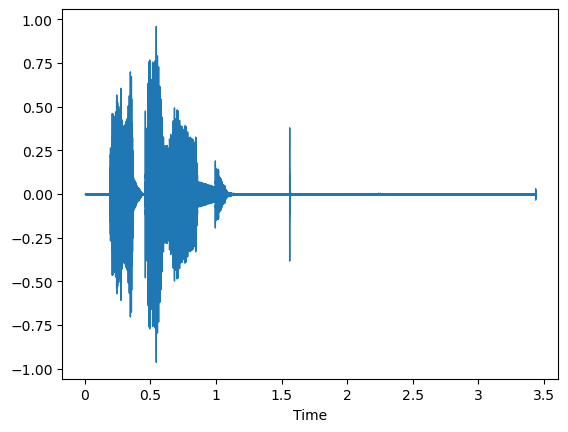

In [31]:
# -------------------------------------------------------------------------------
def _plot(waveform, sample_rate, title):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    if title == "Waveform":
      axes[c].plot(time_axis, waveform[c], linewidth=1)
      axes[c].grid(True)
    else:
      axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
  figure.suptitle(title)
  plt.show(block=False)

def plot_waveform(waveform, sample_rate, title):
  _plot(waveform, sample_rate, title + "Waveform")

def plot_specgram(waveform, sample_rate, title):
  _plot(waveform, sample_rate, title + "Spectrogram")
  
# Normalising the spectral centroid for visualization
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

def get_spectral_centroid(waveform_data, sample_rate):
  spectral_centroids = librosa.feature.spectral_centroid(waveform_data, sr=sample_rate)[0]
  print(spectral_centroids.shape)
  plt.figure(figsize=(12,4))
  frames = range(len(spectral_centroids))
  t = librosa.frames_to_time(frames)
  
  # Plotting the Spectral centroid along the waveform
  librosa.display.waveshow(waveform_data, sr=sample_rate, alpha=0.4)
  plt.plot(t, normalize(spectral_centroids), color='b')
  SpecCentroid = list(zip(t,normalize(spectral_centroids)))
  print(list(zip(t,normalize(spectral_centroids))))
  print(sum(1 for x,y in SpecCentroid if x == y) / len(t))
  
# waveform, sample_rate = torchaudio.load("InputAbraham.wav")
# metadata = torchaudio.info("InputAbraham.wav")

audio = AudioSegment.from_wav("InputAbraham.wav")
audio = audio + 15
audio.export("BoostedAbraham.wav", format="wav")
display(Audio("BoostedAbraham.wav"))

waveform, sample_rate = librosa.load("BoostedAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


print(waveform.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")
# plot_specgram(waveform, sample_rate, "Input Abraham")

# get_spectral_centroid(waveform, sample_rate)


print(waveform)


waveform2, sample_rate = librosa.load("InputAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


print(waveform2.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")
# plot_specgram(waveform, sample_rate, "Input Abraham")

# get_spectral_centroid(waveform, sample_rate)


print(waveform2)

print(len(waveform))

for i in range(len(waveform)):
    if abs(waveform[i]) > 0.01:
        # Give some leeway
        i -= 3000
#         time = (4/i)
#         song = AudioSegment.from_wav("InputAbraham.wav")
#         first_10_seconds = song[:ten_seconds]
        waveform = waveform[i:]
        break
    else:
        continue

print(len(waveform))
        
for i in range(len(waveform)-1, 0, -1):
    if abs(waveform[i]) > 0.01:
        # Give some leeway
#         time = (4/i)
#         song = AudioSegment.from_wav("InputAbraham.wav")
#         first_10_seconds = song[:ten_seconds]
        waveform = waveform[:i]
        break
    else:
        continue

        
print(waveform)
print(waveform2)
librosa.display.waveshow(waveform, sr=sample_rate)

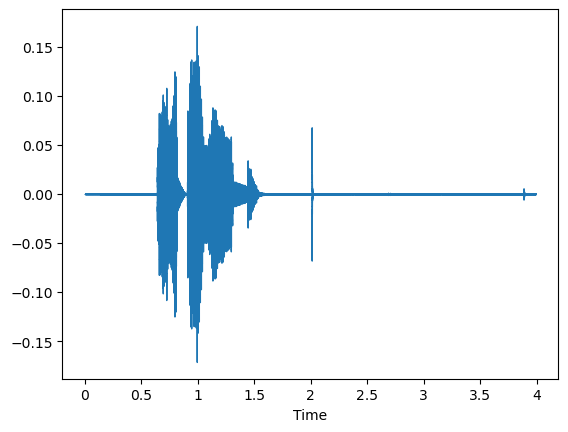

In [16]:
waveform, sample_rate = librosa.load("InputAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


# print(waveform2.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")

librosa.display.waveshow(waveform, sr=sample_rate)

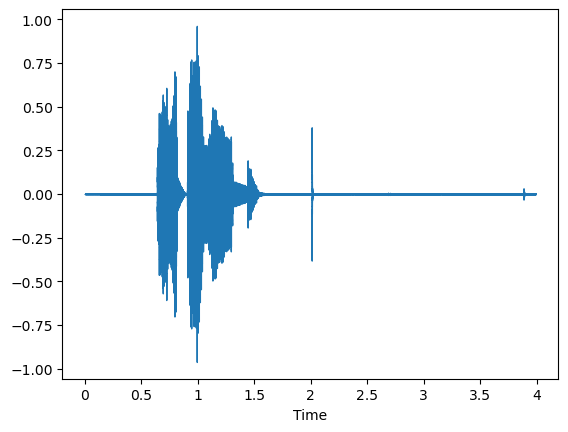

In [17]:
waveform, sample_rate = librosa.load("BoostedAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


# print(waveform2.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")

librosa.display.waveshow(waveform, sr=sample_rate)

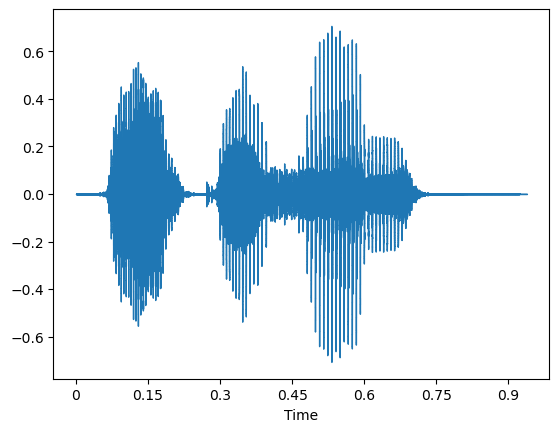

In [18]:
waveform, sample_rate = librosa.load("Abraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


# print(waveform2.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")

librosa.display.waveshow(waveform, sr=sample_rate)